# Acid Buffering Capacity/ Total Alkalinity (TA) and DIC relationship open carbonate system

The solution is in equilibrium with the atmospheric partial pressure of CO2

To model everything phreeqpython was used a python wrapper for phreeqc

In [15]:
from phreeqpython import PhreeqPython

import numpy as np


from matplotlib import pyplot as plt

import pandas as  pd

In [16]:
# use the vitens database for all constants


# create new PhreeqPython instance

pp = PhreeqPython(database='minteq.v4.dat')

pp = PhreeqPython(database='vitens.dat')



In [17]:
# pH range to test
pH_full=np.arange(2,14.5,0.1)


#create a dataframe to save the results
col_names=['pH','DIC']

#fractions
df=pd.DataFrame(data=np.zeros([pH_full.size,len(col_names)]),columns=col_names)
df['pH']=pH_full







# empty list that will be filled
DIC, pH_value, CO2, HCO3, CO3, TA, OH, H   =[], [], [], [], [], [], [], []

temp=25

# in Phreeqc default units are mmol/kgw
solution1=pp.add_solution({'temp':temp})

#concentration CO2
p=415 # ppm

#partial pressure pCO2 in atm
pCO2=p*1e-6 


for item in pH_full:

    
    #make a copy of the inital solution for the calculation
    # this prevents overwriting the solution and always starts new from scratch
    # always new fresh water
    sol = solution1.copy()
    
    
    #change the pH with HCl or NaOH
    sol.change_ph(item)
    
    #phreeqc always uses log10 values
    input_pCO2=np.log10(pCO2)
    
    
    # equalize solution with CO2
    # equilibrium with atmosphere
    sol.equalize(['CO2(g)'], [input_pCO2])
       
    #make sure  the unit is mol
    #co2=sol.total('CO2',units='mol')
    #hco3=sol.total('HCO3',units='mol')
    #co3=sol.total('CO3',units='mol')
    
    
    #test with species
    co2=sol.species['CO2'] #mol/kg
    hco3=sol.species['HCO3-'] #mol/kg
    co3=sol.species['CO3-2'] #mol/kg
    
    
    rho=sol.mass
    
    # get the H and OH concentrations
    h=sol.species['H+']   # species are in mol/l
    oh=sol.species['OH-'] 
    
    # simple 
    dic=co2+hco3+co3
    
    #alkalinity definition of the pure carbonate system (no other species than carbonates, OH-, H+, HCO3-, CO3-2 involved )
    ta=hco3+2*co3+oh-h


    #write data into lists for plots later
    DIC.append(dic)
    CO2.append(co2)
    HCO3.append(hco3)
    CO3.append(co3)
    pH_value.append(sol.pH)
    TA.append(ta)
    OH.append(oh)
    H.append(h)



## DIC(TA) relationship plot

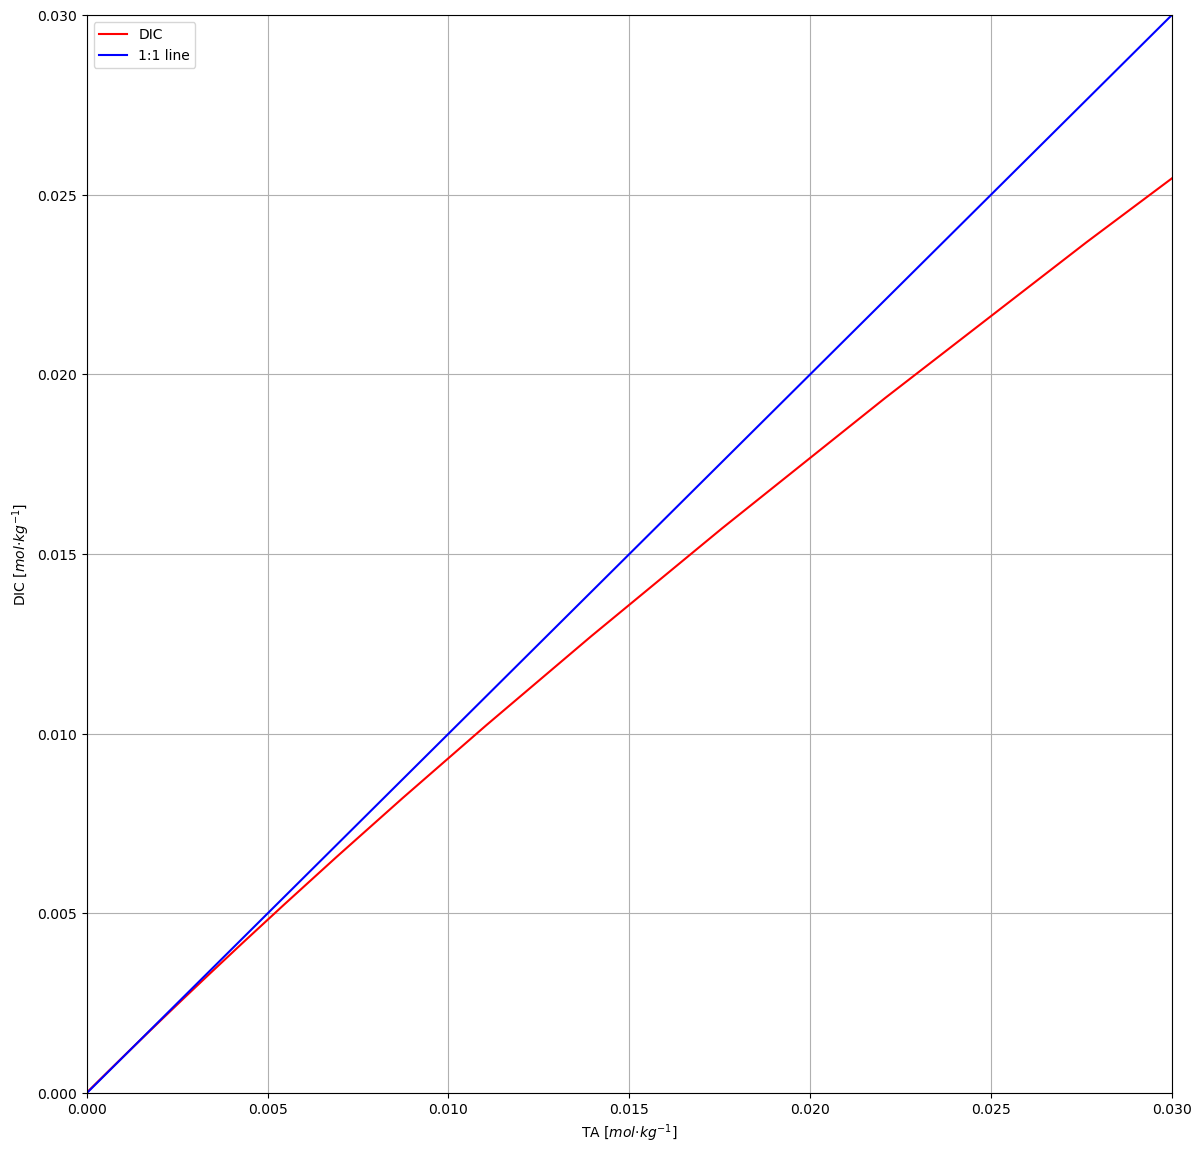

In [18]:
fig = plt.figure(figsize=[14,14])
plt.plot(TA,DIC,label='DIC',color='red')

#define range to display [mol/kg]
lim=[0,0.03]

plt.plot(lim,lim,label='1:1 line',color='blue')

plt.xlabel("TA [$mol·kg^{−1}$]")
plt.ylabel("DIC [$mol·kg^{−1}$]")

plt.xlim(lim)
plt.ylim(lim)

ax1 = plt.gca()
ax1.grid(True)
plt.legend()